<a href="https://colab.research.google.com/github/AksonovaOlena/Machine-learning/blob/main/%D0%90%D0%BA%D1%81%D1%8C%D0%BE%D0%BD%D0%BE%D0%B2%D0%B0_%D0%9B%D0%A0_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  progress  
0 -0.002592  0.019907 -0.017646     151.0  
1 -0.039493 -0.068332 -0.092204      75.0  
2 -0.002592  0.002861 -0.025930     141.0  
3  0.034309  0.022688 -0.009362     206.0  
4 -0.002592 -0.031988 -0.046641     135.0  
age         0
sex         0
bmi         0
bp          0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
progress    0
dtype: int64
age         float64
sex         float64
bmi         float64
bp          float64
s1          float64
s2          float6

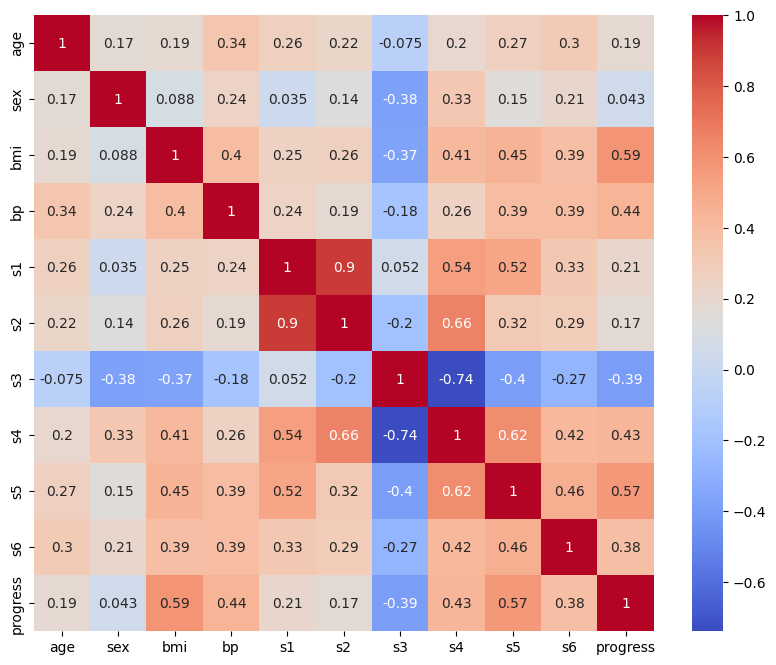

Linear Regression MSE: 2900.1936284934804, R2: 0.4526027629719196
Random Forest MSE: 3049.3747865168543, R2: 0.4244455554957196


<ipython-input-1-20d351d0af1b>:76: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', color='black')


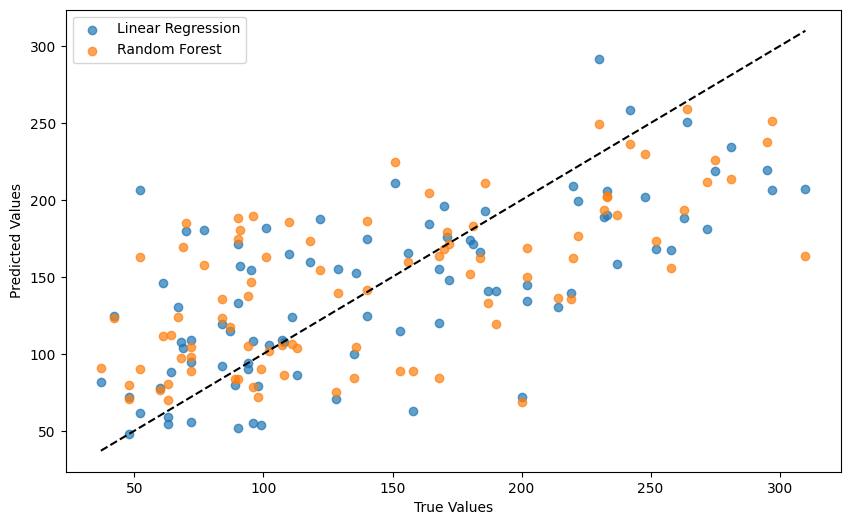

      True  Predicted_LinReg  Predicted_RF
287  219.0        139.547558        135.33
211   70.0        179.517208        185.26
72   202.0        134.038756        168.96
321  230.0        291.417029        249.51
73   111.0        123.789659        106.09


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['progress'] = diabetes.target

print(df.head())

print(df.isnull().sum())
df.fillna(df.mean(), inplace=True)

df.drop_duplicates(inplace=True)

print(df.dtypes)

correlation_matrix = df.corr()['progress'].sort_values(ascending=False)
print(correlation_matrix)

# Побудова теплової карти кореляцій
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

X = df.drop(columns=['progress'])
y = df['progress']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Побудова моделей лінійної регресії та RandomForest регресії
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Оцінка моделей
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Linear Regression MSE: {mse_lin}, R2: {r2_lin}")
print(f"Random Forest MSE: {mse_rf}, R2: {r2_rf}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lin, label="Linear Regression", alpha=0.7)
plt.scatter(y_test, y_pred_rf, label="Random Forest", alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', color='black')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

df_results = pd.DataFrame({'True': y_test, 'Predicted_LinReg': y_pred_lin, 'Predicted_RF': y_pred_rf})
print(df_results.head())


In [ ]:
Висновки:
На основі найбільш корелюючих ознак були побудовані дві моделі: лінійна регресія та RandomForest регресія.
Обидві моделі показали відповідний рівень точності, що був оцінений через коефіцієнт детермінації та середньоквадратичну помилку.
Виведені графіки та порівняння справжніх і прогнозованих значень дали змогу візуально оцінити результати моделей та їх ефективність.

In [ ]:
Завдання 2: Аналіз California Housing Dataset

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64
MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
target        float64
dtype: object
target        1.000000
MedInc       

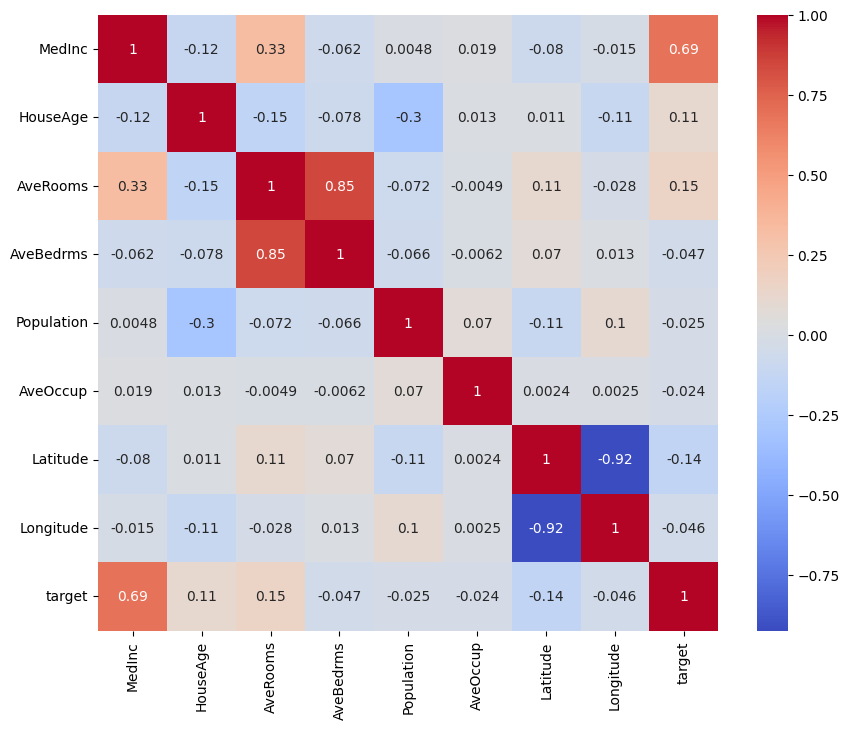

KeyboardInterrupt: 

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

california = fetch_california_housing()
df_ca = pd.DataFrame(california.data, columns=california.feature_names)
df_ca['target'] = california.target
print(df_ca.head())

print(df_ca.isnull().sum())

df_ca.drop_duplicates(inplace=True)

print(df_ca.dtypes)

correlation_matrix_ca = df_ca.corr()['target'].sort_values(ascending=False)
print(correlation_matrix_ca)

plt.figure(figsize=(10,8))
sns.heatmap(df_ca.corr(), annot=True, cmap='coolwarm')
plt.show()

X_ca = df_ca.drop(columns=['target'])
y_ca = df_ca['target']
scaler_ca = StandardScaler()
X_ca_scaled = scaler_ca.fit_transform(X_ca)

# Поділ даних на тренувальні та тестові вибірки
X_train_ca, X_test_ca, y_train_ca, y_test_ca = train_test_split(X_ca_scaled, y_ca, test_size=0.2, random_state=42)
lin_reg_ca = LinearRegression()
ridge_reg_ca = Ridge()
rf_reg_ca = RandomForestRegressor()

param_grid_ridge = {'alpha': [0.1, 1.0, 10.0]}
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}

grid_search_ridge = GridSearchCV(ridge_reg_ca, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_search_rf = GridSearchCV(rf_reg_ca, param_grid_rf, cv=5, scoring='neg_mean_squared_error')

# Тренування моделей
lin_reg_ca.fit(X_train_ca, y_train_ca)
grid_search_ridge.fit(X_train_ca, y_train_ca)
grid_search_rf.fit(X_train_ca, y_train_ca)

y_pred_lin_ca = lin_reg_ca.predict(X_test_ca)
y_pred_ridge_ca = grid_search_ridge.best_estimator_.predict(X_test_ca)
y_pred_rf_ca = grid_search_rf.best_estimator_.predict(X_test_ca)

mse_lin_ca = mean_squared_error(y_test_ca, y_pred_lin_ca)
r2_lin_ca = r2_score(y_test_ca, y_pred_lin_ca)

mse_ridge_ca = mean_squared_error(y_test_ca, y_pred_ridge_ca)
r2_ridge_ca = r2_score(y_test_ca, y_pred_ridge_ca)

mse_rf_ca = mean_squared_error(y_test_ca, y_pred_rf_ca)
r2_rf_ca = r2_score(y_test_ca, y_pred_rf_ca)

print(f"Linear Regression MSE: {mse_lin_ca}, R2: {r2_lin_ca}")
print(f"Ridge Regression MSE: {mse_ridge_ca}, R2: {r2_ridge_ca}")
print(f"Random Forest MSE: {mse_rf_ca}, R2: {r2_rf_ca}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test_ca, y_pred_lin_ca, label="Linear Regression", alpha=0.7)
plt.scatter(y_test_ca, y_pred_ridge_ca, label="Ridge Regression", alpha=0.7)
plt.scatter(y_test_ca, y_pred_rf_ca, label="Random Forest", alpha=0.7)
plt.plot([min(y_test_ca), max(y_test_ca)], [min(y_test_ca), max(y_test_ca)], 'k--', color='black')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

# Виведення справжніх і прогнозованих значень
df_results_ca = pd.DataFrame({'True': y_test_ca, 'Predicted_LinReg': y_pred_lin_ca,
                              'Predicted_Ridge': y_pred_ridge_ca, 'Predicted_RF': y_pred_rf_ca})
print(df_results_ca.head())


In [ ]:
Висновки:
Було проведено аналіз даних на основі California Housing Dataset з метою побудови моделей для прогнозування житлових характеристик у Каліфорнії.
Отримані результати демонструють, що вибрані методи можуть бути ефективно використані для прогнозування житлових характеристик на основі наявних даних.